<a href="https://colab.research.google.com/github/RomanKunal/Deep-Learning/blob/main/Weight_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


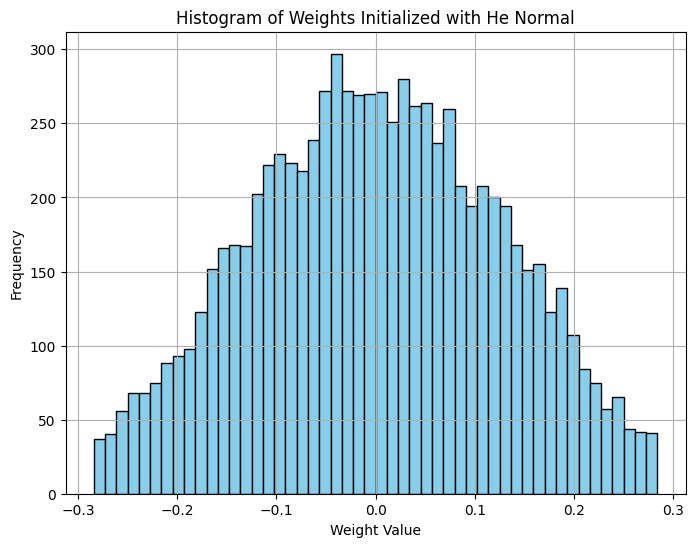

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple model to initialize weights using He Normal
model = models.Sequential([
    layers.Dense(64, input_dim=128, kernel_initializer='he_normal', activation='relu'),
    layers.Dense(32, kernel_initializer='he_normal', activation='relu'),
    layers.Dense(1, kernel_initializer='he_normal', activation='sigmoid')
])

# Get the weights from the first layer
weights = model.layers[0].get_weights()[0]

# Visualizing the distribution of the weights
plt.figure(figsize=(8, 6))
plt.hist(weights.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Weights Initialized with He Normal')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Prepare the data
# Generate a toy dataset (binary classification problem)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Define the neural network model
model = models.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], kernel_initializer='he_normal', activation='relu'),  # First hidden layer
    layers.Dense(32, kernel_initializer='he_normal', activation='relu'),  # Second hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Step 3: Compile the model
model.compile(optimizer='adam',  # Adam optimizer
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])  # Metrics to track during training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=False)
# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Step 6: Make predictions
predictions = model.predict(X_test)

# Optional: Convert predictions from probabilities to class labels
predicted_labels = (predictions > 0.5).astype(int)
print(f"Predictions: {predicted_labels[:5]}")  # Print first 5 predictions


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6404 - loss: 0.6294 - val_accuracy: 0.7550 - val_loss: 0.5484
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7875 - loss: 0.4594 - val_accuracy: 0.7750 - val_loss: 0.5035
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8337 - loss: 0.4049 - val_accuracy: 0.8050 - val_loss: 0.4678
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3656 - val_accuracy: 0.8100 - val_loss: 0.4612
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8536 - loss: 0.3515 - val_accuracy: 0.8400 - val_loss: 0.4428
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8785 - loss: 0.3394 - val_accuracy: 0.8300 - val_loss: 0.4464
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8989 - loss: 0.2727 - val_accuracy: 0.8400 - val_loss: 0.4404
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9133 - loss: 0.2632 - val_accuracy: 0.8350 - val_los

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predictions: [[1]
 [1]
 [1]
 [1]
 [1]]
